In [1]:
#importing necessary packages
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import numpy as np

In [17]:
data = pd.read_csv('Nursery/nursery.data',header=None,skipinitialspace=True)
data.shape

(12960, 9)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
0    12960 non-null object
1    12960 non-null object
2    12960 non-null object
3    12960 non-null object
4    12960 non-null object
5    12960 non-null object
6    12960 non-null object
7    12960 non-null object
8    12960 non-null object
dtypes: object(9)
memory usage: 911.3+ KB


In [19]:
data.columns = ['parents','has_nurs','form','children','housing','finance','social','health','recomendation']
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,recomendation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [22]:
data.children.replace("1","one",inplace=True)
data.children.replace("2","two",inplace=True)
data.children.replace("3","three",inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.parents = enc.fit_transform(data.parents)
data.has_nurs = enc.fit_transform(data.has_nurs)
data.form = enc.fit_transform(data.form)
data.children = enc.fit_transform(data.children)
data.housing = enc.fit_transform(data.housing)
data.finance = enc.fit_transform(data.finance)
data.social = enc.fit_transform(data.social)
data.health = enc.fit_transform(data.health)
data.recomendation = enc.fit_transform(data.recomendation)

In [41]:
X = data.iloc[:,:-1]
y = data.recomendation

(12960,)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                  random_state=10)

In [65]:
#Defining and fitting
model = DecisionTreeClassifier(max_depth=6,criterion='gini',random_state=15,max_features=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=15, splitter='best')

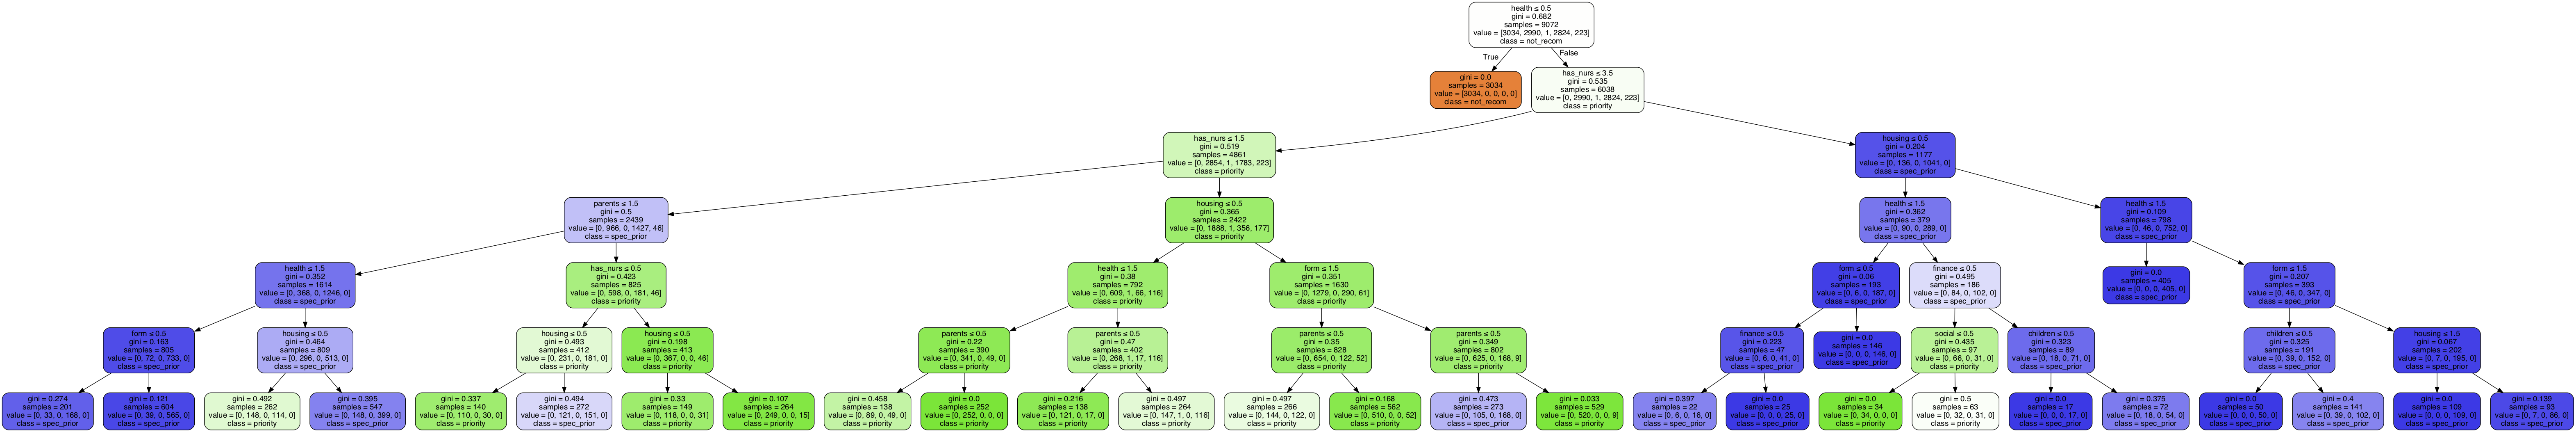

In [69]:
#Visualizing
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, 
                feature_names = X_train.columns,
                class_names=['not_recom','priority','recomended','spec_prior','very_recom'],
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [66]:
from collections import Counter
Counter(data.loc[data.recomendation<5.0,'recomendation'])

Counter({2: 2, 1: 4266, 0: 4320, 4: 328, 3: 4044})

In [67]:
y_predict = model.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.871141975308642


col_0,0,1,3
recomendation,,,
0,1286,0,0
1,0,1041,235
2,0,1,0
3,0,160,1060
4,0,105,0


In [ ]:
# 1 - ((50/104)**2+(48/104)**2+(6/104)**2)

In [ ]:
# 1 - ((10/90)**2+(40/90)**2+(40/90)**2)

In [15]:
# 1 - ((50/70)**2+(10/70)**2+(10/70)**2)